# Определение положение лица человека: фас или профиль

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/cnn/tensorflow/enface_profile.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow import data
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
%matplotlib inline

## Подготовка данных

Загружаем данные для обучения

In [2]:
!curl -s -L -o train.zip "https://www.dropbox.com/scl/fi/j1abedjqgbis6k0qb9g6s/train.zip?rlkey=9b8dk24ssrs966tc0d4np9ca9&dl=1"

Распаковываем архив с обучающим набором данных

In [21]:
data_path = 'data'

In [ ]:
path = Path(data_path)

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)

In [4]:
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall(data_path)

**Создаем DataSet'ы**

In [2]:
batch_size = 64
image_size = (100, 100)

Набор данных для обучения

In [3]:
train_dataset = image_dataset_from_directory(
    "data/train", 
    image_size=image_size, 
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42
)

Found 24228 files belonging to 2 classes.
Using 19383 files for training.


Проверочный набор данных

In [4]:
val_dataset = image_dataset_from_directory(
    "data/train", 
    image_size=image_size, 
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 24228 files belonging to 2 classes.
Using 4845 files for validation.


**Просмотр примеров данных**

In [5]:
class_names = train_dataset.class_names

In [6]:
class_names

['enface', 'profile']

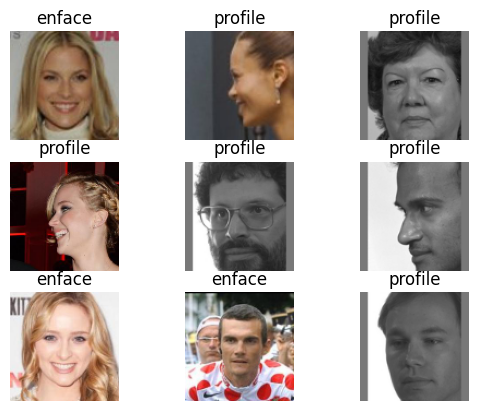

In [7]:
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Настраиваем производительность работы DataSet'ов**

In [8]:
AUTOTUNE = data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

In [9]:
# Создаем последовательную модель
model = Sequential(
    [
        # Предварительная обработка: нормализация
        Rescaling(1./255),
        # Первый сверточный слой
        Conv2D(32, (3, 3), activation='relu'),
        # Первый слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Второй сверточный слой
        Conv2D(64, (3, 3), activation='relu'),
        # Второй слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.25),

        # Слой преобразования данных из 2D представления в плоское
        Flatten(),
        # Полносвязный слой для классификации
        Dense(512, activation='relu'),
        # Слой регуляризации Dropout
        Dropout(0.5),
        # Выходной полносвязный слой
        Dense(1, activation='sigmoid')
    ]
)

**Компилируем модель**

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [11]:
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    verbose=1)

Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 64s 190ms/step - accuracy: 0.9370 - loss: 0.2085 - val_accuracy: 0.9827 - val_loss: 0.0779
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 59s 195ms/step - accuracy: 0.9897 - loss: 0.0332 - val_accuracy: 0.9880 - val_loss: 0.0377
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9924 - val_loss: 0.0279
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.9960 - loss: 0.0146 - val_accuracy: 0.9911 - val_loss: 0.0320
Epoch 5/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 55s 183ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9928 - val_loss: 0.0269


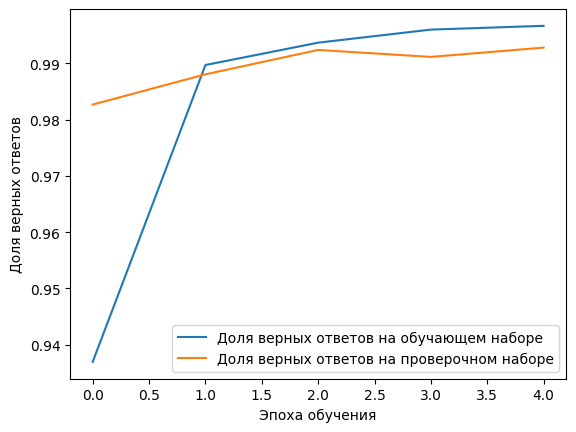

In [12]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

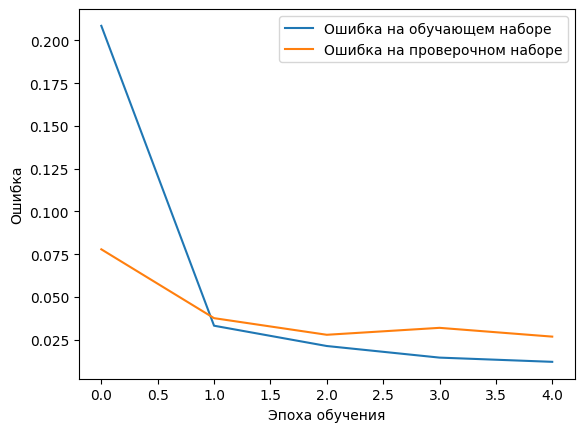

In [13]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [14]:
model.save("enface_profile.keras")

## Применяем сеть для распознавания объектов на изображениях

**Смотрим загруженную картинку**

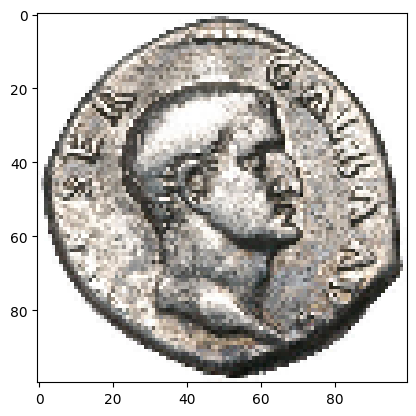

In [35]:
img_path = '../profile.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [36]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [37]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [38]:
prediction

array([[0.9999327]], dtype=float32)

**Обязательно попробуйте распознать свои изображения!**

## Распознаем изображения их тестового набора данных

Загружаем данные для распознавания

In [19]:
!curl -s -L -o test.zip "https://www.dropbox.com/scl/fi/twyiww5k9i3vwljnma8f6/test_labels.zip?rlkey=d9ut021u4mzcmbywyanfo1w7g&dl=1"

Распаковываем архив

In [22]:
with zipfile.ZipFile('test.zip', 'r') as zip_ref:
    zip_ref.extractall(data_path)

Тестовый набор данных

In [26]:
test_dataset = image_dataset_from_directory(
    "data/test", 
    image_size=image_size, 
    batch_size=batch_size,
    shuffle=False,
)

Found 11514 files belonging to 2 classes.


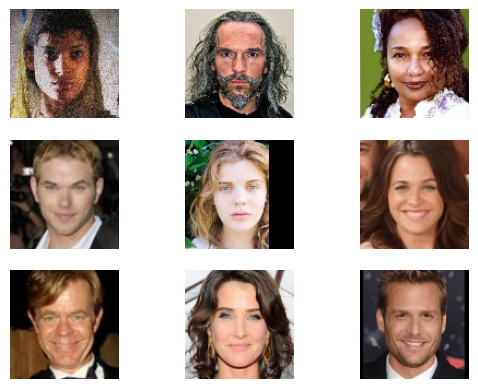

In [30]:
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [28]:
scores = model.evaluate(test_dataset, verbose=1)

180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9939 - loss: 0.0221


In [29]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 99.392


## Идеи по улучшению качества решения

1. Попробуйте использовать разное количество блоков слой свертки + слой подвыборки.
2. Используйте разное количество сверточных слоев в блоке (1, 2, 3).
3. Используйте разные размеры свертки (3х3, 5х5, 7х7).
4. Используйте Data Augmentation.
5. Используйте разное количество нейронов в полносвязном слое.
6. Используйте несколько полносвязных слоев.
7. Используйте разное значение параметра dropout rate.
8. Используйте разное количество эпох: 10, 20, 30, 50, 100.
9. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
10. Используйте разные [оптимизаторы](https://keras.io/api/optimizers/): adam, rmsprop и другие.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.